# Test loading the dataset and collating it into batches for the model

In [ ]:
import logging

## 1. load a batch

In [2]:
from datasets import DatasetDict

In [3]:
dd = DatasetDict.load_from_disk("../data/dataset/metal_site_dataset")

FileNotFoundError: No such file: '/kfs2/projects/proteinml/repos/metal_site_modeling/notebooks/../data/dataset/metal_site_dataset/dataset_dict.json'. Expected to load a `DatasetDict` object, but provided path is not a `DatasetDict`.

In [4]:
ds = dd["train"]

In [5]:
for batch in ds.iter(batch_size=2):
    break

## 2. Collate a batch

In [6]:
logging.basicConfig(level=logging.DEBUG)

In [7]:
from metalsitenn.atom_vocabulary import AtomTokenizer
from metalsitenn.data import AtomicSystemBatchCollator

DEBUG:pydot:pydot initializing
DEBUG:pydot:pydot 3.0.3
DEBUG:pydot.dot_parser:pydot dot_parser module initializing
DEBUG:pydot.core:pydot core module initializing


In [8]:
tokenizer = AtomTokenizer(
    metal_known=False,
    aggregate_uncommon=True,
    keep_hydrogen=False,
    allow_unknown=True)

In [9]:
collator = AtomicSystemBatchCollator(tokenizer=tokenizer, mask_rate=0.15, noise_rate=0.15, already_tokenized=True)

In [10]:
batch

{'pos': [[[126.086, 56.94, 12.261],
   [126.984, 57.427, 11.182],
   [124.797, 57.629, 12.519],
   [125.753, 55.414, 11.953],
   [124.955, 54.653, 12.849],
   [123.82, 53.951, 12.144],
   [122.867, 54.926, 11.635],
   [124.207, 53.073, 10.951],
   [123.327, 51.948, 10.906],
   [123.882, 53.971, 9.764],
   [123.651, 53.273, 8.56],
   [122.618, 54.654, 10.271],
   [122.244, 55.894, 9.585],
   [123.015, 56.981, 9.278],
   [122.348, 57.925, 8.66],
   [121.056, 57.433, 8.55],
   [119.874, 57.957, 7.99],
   [119.778, 59.155, 7.405],
   [118.761, 57.197, 8.054],
   [118.842, 55.996, 8.637],
   [119.894, 55.4, 9.194],
   [120.982, 56.182, 9.12],
   [123.588, 50.66, 11.83],
   [125.053, 50.515, 12.01],
   [122.761, 49.56, 11.275],
   [122.971, 51.044, 13.248],
   [121.634, 50.697, 13.579],
   [120.706, 51.869, 13.396],
   [120.621, 52.208, 11.989],
   [119.259, 51.665, 13.807],
   [119.062, 51.797, 15.201],
   [118.542, 52.729, 12.992],
   [118.755, 54.018, 13.555],
   [119.323, 52.666, 11.684]

In [11]:
out_batch = collator(batch)

In [12]:
out_batch

{'atoms': tensor([ 9,  0,  8,  8,  0,  3,  8,  3,  8,  3,  8,  3,  7,  3,  0,  3,  0,  7,
          7,  3,  7,  0,  9,  8,  8,  8,  3,  3,  8,  3,  8,  3,  8,  0,  7,  3,
          7,  3,  0,  8,  7,  3,  7,  7,  3,  0,  0,  8,  8,  3,  3,  0,  3,  8,
          3,  8,  3,  0,  0,  8,  7,  3,  7,  3,  3,  9,  8,  8,  8,  3,  3,  0,
          0,  8,  3,  8,  3,  7,  3,  7,  3,  3,  8,  7,  3,  7,  7,  3,  9,  0,
          8,  8,  3,  3,  8,  3,  8,  3,  8,  3,  7,  3,  7,  3,  3,  8,  7,  3,
          7,  7,  0,  9,  8,  0,  8,  3,  3,  8,  3,  8,  3,  0,  3,  7,  3,  0,
          7,  3,  7,  3,  3,  9,  8,  8,  0,  3,  3,  8,  3,  8,  3,  8,  3,  7,
          3,  8,  7,  3,  0,  3,  3,  9,  0,  0,  0,  3,  3,  8,  3,  8,  3,  8,
          0,  7,  3,  7,  3,  0,  7,  7,  3,  7,  3,  9,  8,  8,  8,  3,  3,  8,
          3,  8,  3,  8,  3,  7,  3,  7,  3,  3,  8,  0,  3,  7,  7,  3,  9,  8,
          8,  8,  0,  3,  8,  0,  8,  3,  8,  3,  7,  3,  7,  3,  0,  7,  7,  3,
          7,  3,  9

In [13]:
out_batch.keys()

dict_keys(['atoms', 'atom_types', 'pos', 'batch_idx', 'atom_labels', 'atom_type_labels', 'mask', 'denoise_vectors', 'noise_mask', 'atom_names', 'id'])

## 3. Construct model

### 3.1 foundational model

In [14]:
from metalsitenn.model import MetalSiteFoundationalModel, MetalSiteNNConfig, MetalSiteForPretrainingModel

DEBUG:matplotlib:matplotlib data path: /Users/ekomp/.local/lib/python3.10/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/Users/ekomp/.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is darwin
DEBUG:matplotlib:CACHEDIR=/Users/ekomp/.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /Users/ekomp/.matplotlib/fontlist-v390.json


In [15]:
config = MetalSiteNNConfig(
    atom_vocab_size=tokenizer.atom_vocab.vocab_size,
    atom_type_vocab_size=tokenizer.record_vocab.vocab_size,
    output_attentions=True,
    output_hidden_states=True)

In [16]:
fmod = MetalSiteFoundationalModel(config)

In [17]:
fout = fmod(**out_batch)

In [18]:
len(fout.hidden_states)

2

### 3.2 full pretraining model

In [19]:
model = MetalSiteForPretrainingModel(config)

In [20]:
out_batch.keys()

dict_keys(['atoms', 'atom_types', 'pos', 'batch_idx', 'atom_labels', 'atom_type_labels', 'mask', 'denoise_vectors', 'noise_mask', 'atom_names', 'id'])

In [21]:
full_outs = model(**out_batch)

In [22]:
full_outs.atom_logits.shape

torch.Size([534, 14])

In [23]:
tokenizer.atom_vocab.vocab_size

14

In [24]:
full_outs.type_logits.shape

torch.Size([534, 3])

In [25]:
full_outs.output_vectors.shape

torch.Size([534, 3])

In [26]:
full_outs.mask_loss

tensor(3.8855, grad_fn=<AddBackward0>)

In [27]:
full_outs.coord_loss

tensor(0.1644, grad_fn=<MseLossBackward0>)

Outputs look good. try to run some back prop. Make a really small model

In [28]:
from metalsitenn.model import get_irreps

In [29]:
internal_irreps, head_irreps = get_irreps(
    l=2,
    scale=16,
    num_heads=2,
    decay=.5
)

In [30]:
config.irreps_node_feats = internal_irreps
config.irreps_node_output = internal_irreps
config.irreps_head = head_irreps
config.num_layers = 2
config.num_heads = 2

In [31]:
model = MetalSiteForPretrainingModel(config)

In [32]:
# count params
sum(p.numel() for p in model.parameters())

157387

In [33]:
import torch

In [34]:
device = torch.device('cpu')
model = model.to(device)

# Convert batch tensors to device
for k,v in out_batch.items():
    if isinstance(v, torch.Tensor):
        out_batch[k] = v.to(device)

# Setup training
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
mask_losses = []
noise_losses = []
total_losses = []

# Train loop
n_steps = 5
for step in range(n_steps):
    optimizer.zero_grad()
    
    outputs = model(**out_batch)
    loss = outputs.mask_loss + outputs.coord_loss
    
    loss.backward()
    optimizer.step()
    
    # Record losses
    mask_losses.append(outputs.mask_loss.item())
    noise_losses.append(outputs.coord_loss.item())
    total_losses.append(loss.item())
    
    if step % 10 == 0:
        print(f"Step {step}: Mask Loss {mask_losses[-1]:.3f}, Noise Loss {noise_losses[-1]:.3f}")

Step 0: Mask Loss 3.788, Noise Loss 0.167


In [35]:
# get the output vectors and labels
model.eval()

outputs = model(**out_batch)

In [36]:
atom_logits = outputs.atom_logits
atom_type_logits = outputs.type_logits
output_vectors = outputs.output_vectors

In [37]:
# predict the atom type and atom
predicted_atom_types = torch.argmax(atom_type_logits, dim=-1)
predicted_atoms = torch.argmax(atom_logits, dim=-1)

In [38]:
# look at the actual labels that were masked and the predictions
predicted_atoms[out_batch["mask"]]

tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5])

In [39]:
out_batch["atom_labels"][out_batch["mask"]]

tensor([ 8,  3,  7,  3,  3,  3,  3,  9,  8,  8,  7,  3,  8,  3,  8,  3,  8,  8,
         8,  8,  8,  8,  8,  8,  3,  3,  7,  3,  3,  3,  8,  3,  3,  7,  7,  3,
         7,  3,  8,  7,  3,  7,  8,  3,  8,  7,  8,  3,  3,  3,  8,  3,  8,  8,
         3,  3,  3,  3,  3,  3,  3,  3,  3, 10,  8,  3,  8,  3,  8,  3,  3,  3,
         3,  3,  7,  8,  3,  3,  8,  8])

In [40]:
output_vectors[out_batch["noise_mask"]]

tensor([[-8.0999e-02, -7.9526e-03, -2.8659e-02],
        [-4.8267e-02, -7.5862e-02,  2.2834e-02],
        [ 4.1394e-02,  6.9427e-04, -2.8985e-02],
        [-1.4984e-01, -3.5269e-03, -5.9747e-02],
        [-2.9910e-02, -3.3373e-02,  9.9892e-02],
        [ 3.8046e-02,  4.9949e-02,  1.2970e-02],
        [-1.5806e-02, -1.9585e-02,  1.3273e-02],
        [-6.3471e-02,  8.1707e-03,  9.6728e-02],
        [ 3.2854e-03, -6.8153e-02,  8.9208e-02],
        [-1.9759e-02,  4.0869e-02, -6.2152e-02],
        [ 2.4379e-02, -1.5708e-02,  1.3430e-02],
        [-1.2465e-01,  1.1141e-02, -1.0496e-02],
        [-1.2575e-02,  5.8218e-02,  3.3215e-02],
        [-2.2620e-02, -3.4325e-02, -1.4754e-02],
        [ 7.7826e-02,  5.2150e-02, -6.9099e-02],
        [ 1.3228e-02, -4.0612e-03,  4.7303e-02],
        [ 1.4418e-01, -8.1525e-03, -5.6824e-02],
        [-3.1606e-03, -1.2152e-02,  2.0713e-02],
        [ 3.2445e-02, -3.4066e-03, -1.0943e-02],
        [-6.4023e-03, -1.8042e-02, -7.7252e-02],
        [ 5.1209e-03

In [41]:
out_batch['denoise_vectors'][out_batch["noise_mask"]]

tensor([[ 8.1309e-01, -7.2310e-01, -7.6306e-01],
        [-2.0802e+00,  1.4571e-01, -1.0878e+00],
        [ 1.2792e+00, -1.3995e+00,  1.0527e+00],
        [ 2.3498e-01, -4.5089e-01, -2.3516e+00],
        [-1.2301e+00, -3.8684e-01,  9.9484e-01],
        [ 7.9031e-02, -1.1338e-01, -6.6743e-01],
        [ 2.3850e-01, -1.2072e+00,  1.3715e+00],
        [ 2.4401e-01,  6.6161e-01,  8.0845e-01],
        [ 6.5848e-01, -5.8368e-01,  8.4047e-02],
        [-1.5562e+00, -5.9391e-01,  3.9762e-01],
        [-2.4159e-01,  7.3030e-01, -1.8062e+00],
        [-6.6705e-01,  1.3610e+00, -5.3558e-01],
        [ 1.4458e+00, -1.0197e+00, -8.8852e-01],
        [-3.0302e-01,  1.0515e+00,  1.6322e+00],
        [ 8.3371e-01, -1.1036e+00,  1.0066e+00],
        [ 8.1050e-02,  1.0131e+00,  1.1430e+00],
        [-4.7543e-01,  3.7660e-01, -2.4775e-01],
        [ 1.0257e+00, -1.7551e+00, -3.3242e-01],
        [-5.6684e-01,  2.8590e-01,  4.4313e-01],
        [-1.8695e-01,  8.8711e-01,  2.2690e-01],
        [ 1.9915e+00

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/ekomp/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/ekomp/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/ekomp/.local/lib/python3.10/site-packages/matplotlib/mpl-data/

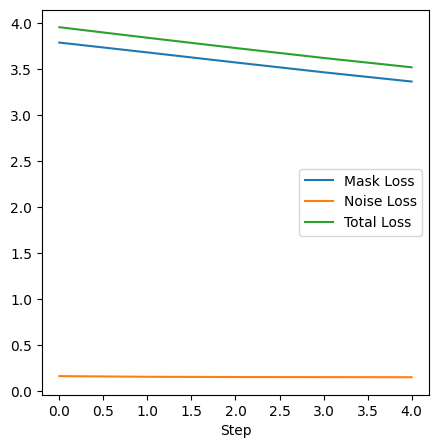

In [42]:
# plot loss
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(mask_losses, label="Mask Loss")
ax.plot(noise_losses, label="Noise Loss")
ax.plot(total_losses, label="Total Loss")
ax.set_xlabel("Step")
plt.legend()

## 4. plot the resulting atomic system

In [43]:
import numpy as np

In [44]:
from metalsitenn.plotting import plot_atoms_and_vectors

In [45]:
actual_positions_one_system = torch.Tensor(batch["pos"][0])
noised_positions_one_system = out_batch["pos"][out_batch["batch_idx"] == 0]
noised_mask_one_system = out_batch["noise_mask"][out_batch["batch_idx"] == 0]
out_vectors_one_system = output_vectors[out_batch["batch_idx"] == 0]
atom_tokens_one_system = out_batch["atom_labels"][out_batch["batch_idx"] == 0]
mask_mask_one_system = out_batch["mask"][out_batch["batch_idx"] == 0]
masked_atom_tokens_one_system = out_batch["atoms"][out_batch["batch_idx"] == 0]
masked_atom_token_types_one_system = out_batch["atom_types"][out_batch["batch_idx"] == 0]
predicted_atom_tokens_one_system = predicted_atoms[out_batch["batch_idx"] == 0]
atom_types_tokens_one_system = out_batch["atom_type_labels"][out_batch["batch_idx"] == 0]
predicted_atom_types_tokens_one_system = predicted_atom_types[out_batch["batch_idx"] == 0]

<Axes3D: >

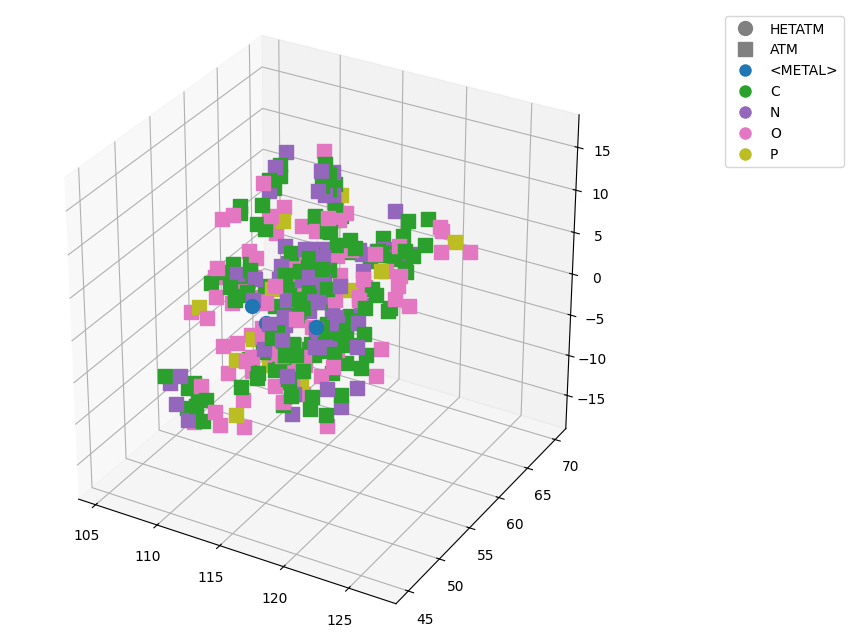

In [46]:
plot_atoms_and_vectors(
    positions=actual_positions_one_system,
    atom_tokens=atom_tokens_one_system,
    atom_types=atom_types_tokens_one_system,
    tokenizer=tokenizer,
)

In [47]:
batch['id']

['4lf7_32', '3c5k_1']

In [48]:
mask_mask_one_system.sum()

tensor(43)

<Axes3D: >

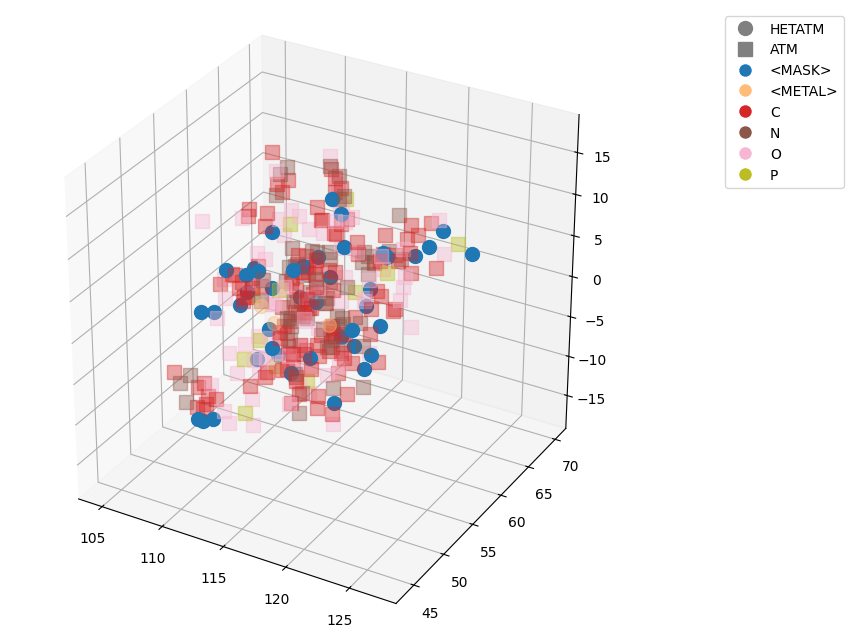

In [49]:
plot_atoms_and_vectors(
    positions=noised_positions_one_system,
    atom_tokens=masked_atom_tokens_one_system,
    atom_types=masked_atom_token_types_one_system,
    tokenizer=tokenizer,
    atom_highlight=np.where(mask_mask_one_system)[0],
)

<Axes3D: >

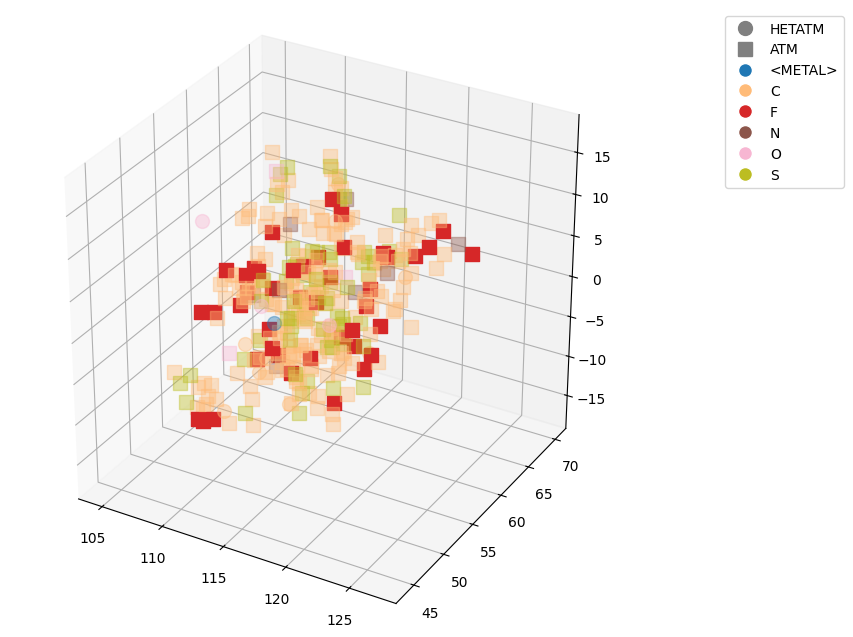

In [50]:
plot_atoms_and_vectors(
    positions=noised_positions_one_system,
    atom_tokens=predicted_atom_tokens_one_system,
    atom_types=predicted_atom_types_tokens_one_system,
    tokenizer=tokenizer,
    atom_highlight=np.where(mask_mask_one_system)[0],
)

<Axes3D: >

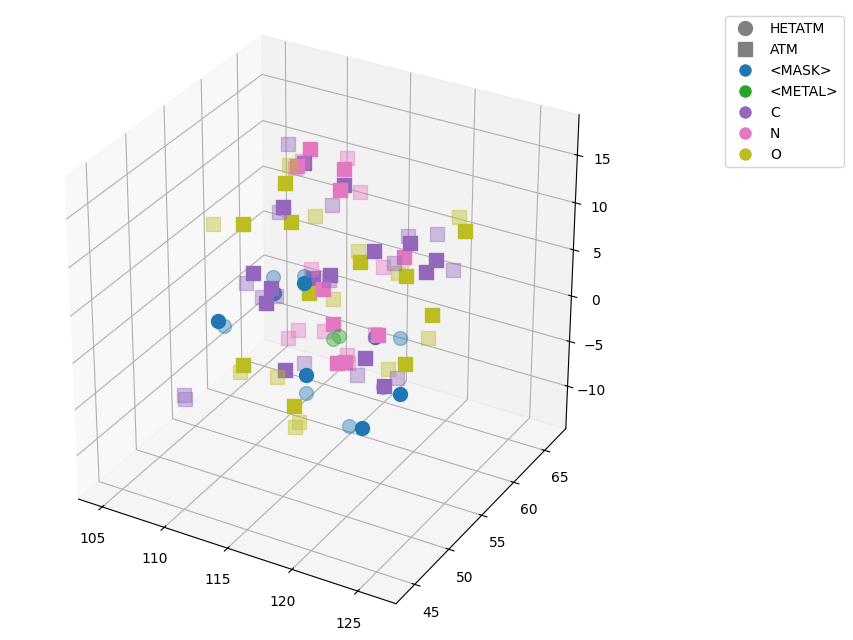

In [51]:
# now show how the position has changed. We will need to concat original positions and tokens, and noised positions and tokens, for
# and highlight the atoms changed positions
plot_atoms_and_vectors(
    positions=torch.cat([actual_positions_one_system[noised_mask_one_system], noised_positions_one_system[noised_mask_one_system]], dim=0),
    atom_tokens=torch.cat([masked_atom_tokens_one_system[noised_mask_one_system], masked_atom_tokens_one_system[noised_mask_one_system]], dim=0),
    atom_types=torch.cat([masked_atom_token_types_one_system[noised_mask_one_system], masked_atom_token_types_one_system[noised_mask_one_system]], dim=0),
    tokenizer=tokenizer,
    atom_highlight=np.arange(mask_mask_one_system.sum()),)

<Axes3D: >

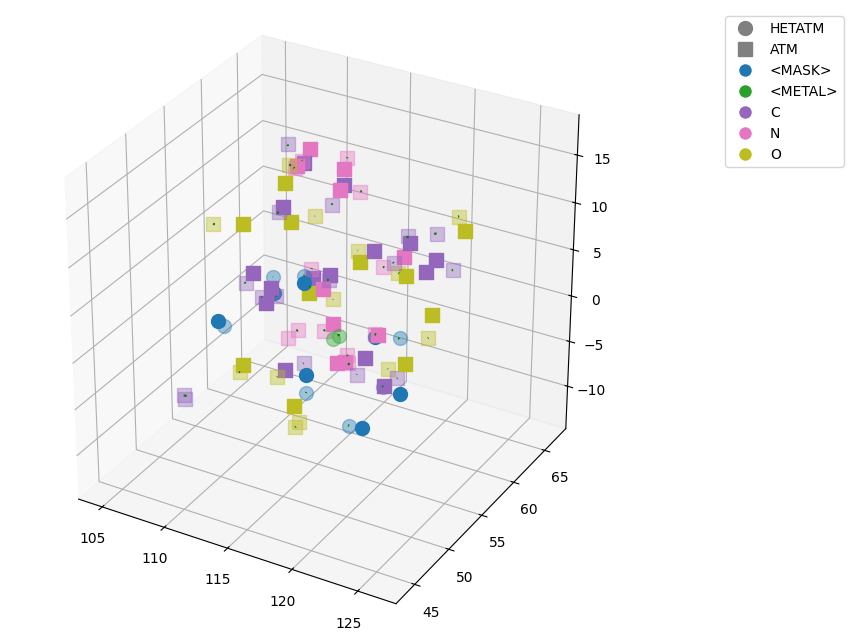

In [52]:
# now show that the predicted vectors place the atoms back in the correct positions
plot_atoms_and_vectors(
    positions=torch.cat([actual_positions_one_system[noised_mask_one_system], noised_positions_one_system[noised_mask_one_system]], dim=0),
    atom_tokens=torch.cat([masked_atom_tokens_one_system[noised_mask_one_system], masked_atom_tokens_one_system[noised_mask_one_system]], dim=0),
    atom_types=torch.cat([masked_atom_token_types_one_system[noised_mask_one_system], masked_atom_token_types_one_system[noised_mask_one_system]], dim=0),
    tokenizer=tokenizer,
    atom_highlight=np.arange(mask_mask_one_system.sum()),
    vectors=torch.cat([torch.zeros_like(out_vectors_one_system[noised_mask_one_system]), out_vectors_one_system[noised_mask_one_system]], dim=0),)

## 2. Try to write a trainer

In [331]:
from dataclasses import dataclass, field

@dataclass(frozen=False)
class MetalSiteTrainingArgs:
   """Training arguments for MetalSite models.
   
   Args:
       output_dir: Directory to save model checkpoints and logs
       num_train_epochs: Number of training epochs
       learning_rate: Initial learning rate
       batch_size: Training batch size
       eval_batch_size: Evaluation batch size, defaults to batch_size
       weight_decay: Weight decay regularization factor
       warmup_steps: Number of warmup steps for LR scheduler
       log_level: Logging level
       logging_steps: Number of steps between logging
       save_steps: Number of steps between model saves
       eval_steps: Number of steps between evaluations
       max_grad_norm: Maximum gradient norm for clipping
       gradient_accumulation_steps: Number of steps to accumulate gradients
       loss_balance: Weight between atom loss (1-x) and coordinate loss (x)
       seed: Random seed
       local_rank: For distributed training
       fp16: Whether to use mixed precision training
       num_workers: Number of dataloader workers
   """
   output_dir: str = field(
       default="outputs",
       metadata={"help": "Directory to save model checkpoints and logs"}
   )
   num_train_epochs: int = field(
       default=3,
       metadata={"help": "Number of training epochs"}
   )
   learning_rate: float = field(
       default=5e-5,
       metadata={"help": "Initial learning rate"}
   )
   batch_size: int = field(
       default=32,
       metadata={"help": "Training batch size"}
   )
   eval_batch_size: Optional[int] = field(
       default=None,
       metadata={"help": "Evaluation batch size, defaults to batch_size"}
   )
   weight_decay: float = field(
       default=0.0,
       metadata={"help": "Weight decay regularization factor"}
   )
   warmup_steps: int = field(
       default=0,
       metadata={"help": "Number of warmup steps for LR scheduler"} 
   )
   log_level: str = field(
       default="info",
       metadata={"help": "Logging level"}
   )
   logging_steps: int = field(
       default=500,
       metadata={"help": "Number of steps between logging"}
   )
   save_steps: int = field(
       default=500, 
       metadata={"help": "Number of steps between model saves"}
   )
   eval_steps: int = field(
       default=500,
       metadata={"help": "Number of steps between evaluations"}
   )
   max_grad_norm: float = field(
       default=1.0,
       metadata={"help": "Maximum gradient norm for clipping"}
   )
   gradient_accumulation_steps: int = field(
       default=1,
       metadata={"help": "Number of steps to accumulate gradients"}
   )
   loss_balance: float = field(
       default=0.5,
       metadata={"help": "Weight between atom loss (1-x) and coordinate loss (x)"}
   )
   seed: int = field(
       default=42,
       metadata={"help": "Random seed"}
   )
   local_rank: int = field(
       default=-1,
       metadata={"help": "For distributed training"}
   )
   fp16: bool = field(
       default=False,
       metadata={"help": "Whether to use mixed precision training"}
   )
   num_workers: int = field(
       default=0,
       metadata={"help": "Number of dataloader workers"}
   )

   def __post_init__(self):
       if self.eval_batch_size is None:
           self.eval_batch_size = self.batch_size

       # Validate arguments
       if self.loss_balance < 0 or self.loss_balance > 1:
           raise ValueError("loss_balance must be between 0 and 1")
       
       if self.gradient_accumulation_steps < 1:
           raise ValueError("gradient_accumulation_steps must be >= 1")
           
       if self.num_workers < 0:
           raise ValueError("num_workers must be >= 0")

In [ ]:
from accelerate import Accelerator
from torch.utils.data import DataLoader

class MetalSiteGraphTrainer:
    def __init__(
        self,
        model,
        args,
        train_dataset,
        eval_dataset=None,
        data_collator=None,  # Required
        compute_metrics=None,
    ):
        if data_collator is None:
            raise ValueError("data_collator is required for graph batching")
            
        self.accelerator = Accelerator()
        self.model = model
        self.args = args
        self.train_dataset = train_dataset 
        self.eval_dataset = eval_dataset
        self.data_collator = data_collator
        self.compute_metrics = compute_metrics

        # Setup optimizer
        self.optimizer = torch.optim.AdamW(
            model.parameters(),
            lr=args.learning_rate,
            weight_decay=args.weight_decay
        )
        
        # Create dataloaders with collator 
        self.train_dataloader = DataLoader(
            train_dataset,
            batch_size=args.batch_size,
            collate_fn=self.data_collator,  # Use the collator
            shuffle=True,
            num_workers=args.num_workers if hasattr(args, 'num_workers') else 0
        )
        
        if eval_dataset:
            self.eval_dataloader = DataLoader(
                eval_dataset,
                batch_size=args.eval_batch_size if hasattr(args, 'eval_batch_size') else args.batch_size,
                collate_fn=self.data_collator,  # Use the collator
                shuffle=False
            )

    def train(self):
        """Training loop"""
        self.model.train()
        
        for epoch in range(self.args.num_epochs):
            total_loss = 0
            
            for batch in self.train_dataloader:
                with self.accelerator.accumulate(self.model):
                    # Forward pass
                    outputs = self.model(**batch)
                    
                    # Compute loss
                    loss = (1 - self.args.loss_balance) * outputs.mask_loss + \
                           self.args.loss_balance * outputs.coord_loss
                    
                    # Backward pass
                    self.accelerator.backward(loss)
                    
                    if self.accelerator.sync_gradients:
                        self.accelerator.clip_grad_norm_(self.model.parameters(), 1.0)
                        
                    self.optimizer.step()
                    self.optimizer.zero_grad()
                    
                    total_loss += loss.detach().float()
            
            # Evaluate
            if self.eval_dataset:
                metrics = self.evaluate()
                self.accelerator.print(f"Epoch {epoch}: {metrics}")

    @torch.no_grad()
    def evaluate(self):
        """Evaluation loop handling graph-structured data"""
        self.model.eval()
        
        all_preds = []
        all_labels = []
        losses = []
        
        for batch in self.eval_dataloader:
            outputs = self.model(**batch)
            
            # Get predictions and labels keeping batch structure via batch_idx
            preds = {
                'atom_logits': outputs.atom_logits,
                'type_logits': outputs.type_logits, 
                'coords': outputs.output_vectors,
                'batch_idx': batch['batch_idx']
            }
            
            labels = {
                'atoms': batch['atom_labels'],
                'types': batch['atom_type_labels'],
                'coords': batch['denoise_vectors'],
                'batch_idx': batch['batch_idx']  
            }
            
            # Gather from all processes while preserving batch structure
            gathered_preds = {k: self.accelerator.gather(v) for k,v in preds.items()}
            gathered_labels = {k: self.accelerator.gather(v) for k,v in labels.items()}
            
            all_preds.append(gathered_preds)
            all_labels.append(gathered_labels)
            
            # Compute losses
            loss = (1 - self.args.loss_balance) * outputs.mask_loss + \
                   self.args.loss_balance * outputs.coord_loss
            losses.append(loss.detach())

        # Compute metrics using batch_idx to maintain example structure
        metrics = self.compute_metrics(all_preds, all_labels)
        metrics['eval_loss'] = torch.mean(torch.stack(losses))
        
        return metrics

# 3. Try to wrap a HF trainer

In [311]:
# metalsitenn/training.py

from dataclasses import dataclass, field
from typing import Optional, Dict, Any
from transformers import Trainer, TrainingArguments, EvalPrediction
import torch
from torch.utils.data import DataLoader

@dataclass
class MetalSiteTrainingArguments(TrainingArguments):
    """Arguments for metal site model training extending HuggingFace TrainingArguments.
    
    Args:
        loss_balance: Weight between atom loss (1-x) and coordinate loss (x)
        **kwargs: Arguments passed to TrainingArguments
    """
    loss_balance: float = field(default=0.7, metadata={"help": "Weight between atom loss (1-x) and coordinate loss (x)"})

    def __post_init__(self):
        super().__post_init__()

class MetalSiteTrainer(Trainer):
    """Custom trainer for metal site models extending HuggingFace Trainer.
    
    Handles custom data collation, loss computation and metrics for metal site pretraining.
    """

    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        """Custom loss computation combining mask and coordinate losses."""
        outputs = model(**inputs)
        
        # Weight the losses
        loss = (1 - self.args.loss_balance) * outputs.mask_loss + \
               self.args.loss_balance * outputs.coord_loss

        return (loss, outputs.__dict__) if return_outputs else loss
    
    # def prediction_step(self, model, inputs, prediction_loss_only=False, **kwargs):
    #     """Prediction step returning detached unkeyed tuples for HF trainer."""
        
    #     with torch.no_grad():  # Ensure no gradients during eval
    #         loss, outputs = self.compute_loss(model, inputs, return_outputs=True)
    #         logits = (outputs.atom_logits, outputs.type_logits, outputs.output_vectors)
    #         labels = (inputs["atom_labels"], inputs["atom_type_labels"], inputs["pos"])
    #         loss = loss.mean().detach()

    #         if prediction_loss_only:
    #             return (loss, None, None)
    #         else:
    #             return (loss, logits, labels)
        
    def get_batch_samples(self, epoch_iterator, num_batches):
        batch_samples = []
        num_items_in_batch = None
        for _ in range(num_batches):
            try:
                batch_samples += [next(epoch_iterator)]
            except StopIteration:
                break

        if len(batch_samples) > 0 and "atom_labels" in batch_samples[0]:
            # For now we don't support object detection
            try:
                # get total number of atoms
                num_items_in_batch = sum([len(batch["atom_labels"]) for batch in batch_samples])
            except (TypeError, AttributeError):
                pass

        if self.args.average_tokens_across_devices:
            num_items_in_batch = self.accelerator.gather(num_items_in_batch).sum().item()

        if torch.is_tensor(num_items_in_batch):
            num_items_in_batch = num_items_in_batch.item()

        return batch_samples, num_items_in_batch

    
def compute_metrics(eval_pred):
    """Compute metrics from numpy prediction tuples.

    Args:
        eval_pred: EvalPrediction containing:
            - predictions: (atom_logits, type_logits, coords) as numpy arrays
            - label_ids: (atom_labels, type_labels, coord_targets) as numpy arrays
    """
    atom_logits, type_logits, coords, _, _, _, _, _, mask_loss, coord_loss = eval_pred.predictions
    atom_labels, type_labels, coord_targets = eval_pred.label_ids
    # print all shapes
    print(f"""
    atom_logits: {atom_logits.shape}
    type_logits: {type_logits.shape}
    coords: {coords.shape}
    atom_labels: {atom_labels.shape}
    type_labels: {type_labels.shape}
    coord_targets: {coord_targets.shape}      
    """)

    metrics = {}
    
    # Atom type accuracy
    atom_preds = atom_logits.argmax(-1)
    metrics['atom_acc'] = (atom_preds == atom_labels).mean()

    # Record type accuracy 
    type_preds = type_logits.argmax(-1)
    metrics['type_acc'] = (type_preds == type_labels).mean()

    # Coordinate error
    mask = np.abs(coord_targets).sum(-1) > 0  # Use np.abs instead of .abs()
    coord_error = np.abs(coords - coord_targets)[mask].mean()
    metrics['coord_error'] = coord_error

    if mask_loss is not None:
        metrics['mask_loss'] = mask_loss.mean().detach().numpy()
    if coord_loss is not None:
        metrics['coord_loss'] = coord_loss.mean().detach().numpy()
    
    if eval_pred.losses is not None:
        metrics['loss'] = eval_pred.losses.mean().detach().numpy()

    return metrics

In [312]:
# make a much smaller model
internal_irreps, head_irreps = get_irreps(
    l=1,
    scale=4,
    num_heads=2,
    decay=.5
)

config = MetalSiteNNConfig(
    atom_vocab_size=tokenizer.atom_vocab.vocab_size,
    atom_type_vocab_size=tokenizer.record_vocab.vocab_size,
    output_attentions=True,
    output_hidden_states=True,
    num_layers=1,
    num_heads=2,
    hidden_size=16,
    intermediate_size=32,
    irreps_node_feats=internal_irreps,
    irreps_node_output=internal_irreps,
    irreps_head=head_irreps
)
model = MetalSiteForPretrainingModel(config)

In [313]:
model.num_parameters()

13257

In [314]:
training_args = MetalSiteTrainingArguments(
    output_dir='./tmp',
    overwrite_output_dir=True,
    do_train=True,
    num_train_epochs=1000,
    eval_strategy='steps',
    per_device_train_batch_size=4,
    logging_dir='./tmp',
    logging_steps=10,
    use_cpu=True,
    label_names=['atom_labels', 'atom_type_labels', 'denoise_vectors'],
    include_for_metrics=['loss']
)

using `logging_steps` to initialize `eval_steps` to 10
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [315]:
# single batch
trainer = MetalSiteTrainer(
    model=model,
    args=training_args,
    tokenizer=tokenizer,
    train_dataset=ds.shuffle().select(range(4)),
    eval_dataset=dd['test'].shuffle().select(range(4)),
    data_collator=collator,
    compute_metrics=compute_metrics
)

/var/folders/4b/6yg7r65x0152cnhzpgzdhmvrjcvswz/T/ipykernel_70950/2923293878.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `MetalSiteTrainer.__init__`. Use `processing_class` instead.
  trainer = MetalSiteTrainer(


In [326]:
eval_dataloader = trainer.get_eval_dataloader()
batch = next(iter(eval_dataloader))

The following columns in the evaluation set don't have a corresponding argument in `MetalSiteForPretrainingModel.forward` and have been ignored: atom_names, id. If atom_names, id are not expected by `MetalSiteForPretrainingModel.forward`,  you can safely ignore this message.


In [327]:
losses, logits, labels = trainer.prediction_step(model, batch, prediction_loss_only=False)

In [329]:
labels = trainer.accelerator.pad_across_processes(labels, dim=1, pad_index=-100)[1]

In [330]:
trainer.gather_function((labels))

tensor([1, 1, 1, 1])

In [316]:
trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `MetalSiteForPretrainingModel.forward` and have been ignored: atom_names, id. If atom_names, id are not expected by `MetalSiteForPretrainingModel.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 4
  Batch size = 8


  0%|          | 0/1 [00:00<?, ?it/s]


    atom_logits: (794, 14)
    type_logits: (794, 3)
    coords: (794, 3)
    atom_labels: (4,)
    type_labels: (4,)
    coord_targets: (4, 3)      
    


ValueError: operands could not be broadcast together with shapes (794,) (4,) 

Attempt a semi real training run with a very small model

In [301]:
model = MetalSiteForPretrainingModel(config)

In [292]:
training_args = MetalSiteTrainingArguments(
    output_dir='./tmp',
    overwrite_output_dir=True,
    do_train=True,
    num_train_epochs=3,
    eval_strategy='steps',
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    logging_dir='./tmp',
    logging_steps=10,
    eval_steps=100,
    use_cpu=True,
    label_names=['atom_labels', 'atom_type_labels', 'denoise_vectors'],
    include_for_metrics=['loss'],
    report_to="all"
)
trainer = MetalSiteTrainer(
    model=model,
    args=training_args,
    tokenizer=tokenizer,
    train_dataset=ds,
    eval_dataset=dd['test'].shuffle().select(range(100)),
    data_collator=collator,
    compute_metrics=compute_metrics
)

PyTorch: setting up devices
/var/folders/4b/6yg7r65x0152cnhzpgzdhmvrjcvswz/T/ipykernel_70950/342836609.py:17: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `MetalSiteTrainer.__init__`. Use `processing_class` instead.
  trainer = MetalSiteTrainer(


In [293]:
loss, outputs = trainer.compute_loss(model, out_batch, return_outputs=True)

In [294]:
logits = tuple(k for k, v in outputs.items() if k not in ["loss"])

In [295]:
logits

('atom_logits',
 'type_logits',
 'output_vectors',
 'edge_attr',
 'edge_embedding',
 'node_attr',
 'attentions',
 'hidden_states',
 'mask_loss',
 'coord_loss')

In [296]:
outputs

{'atom_logits': tensor([[-0.0393, -0.1617,  0.0268,  ..., -0.0438,  0.0839,  0.0727],
         [-0.0174, -0.0780, -0.1238,  ..., -0.0153, -0.0407,  0.0555],
         [ 0.0298, -0.0305,  0.0626,  ..., -0.0885, -0.0809,  0.0223],
         ...,
         [-0.0414,  0.0452, -0.0156,  ...,  0.0274, -0.0021, -0.0451],
         [ 0.0511, -0.0052,  0.0149,  ..., -0.0335, -0.0661,  0.0075],
         [ 0.0306,  0.0255, -0.0042,  ..., -0.0254, -0.0540, -0.0049]],
        grad_fn=<SliceBackward0>),
 'type_logits': tensor([[ 0.1347, -0.0442,  0.1339],
         [-0.1338,  0.1011, -0.0108],
         [ 0.0704, -0.1624,  0.1805],
         ...,
         [-0.0063,  0.0288,  0.0658],
         [-0.0061, -0.1180, -0.0048],
         [-0.0022, -0.0668,  0.0032]], grad_fn=<SliceBackward0>),
 'output_vectors': tensor([[-0.0246, -0.0307, -0.0100],
         [ 0.1205,  0.1063, -0.1043],
         [-0.0634,  0.1440,  0.1320],
         ...,
         [-0.0350, -0.0013, -0.0199],
         [ 0.0150, -0.0126, -0.0077],
  

In [297]:
losses, logits, labels = trainer.prediction_step(model, out_batch, prediction_loss_only=False)

In [298]:
logits[0].shape

torch.Size([534, 14])

In [ ]:
trainer.train()

  0%|          | 0/172968 [00:00<?, ?it/s]

{'loss': 1.224, 'grad_norm': 0.33886396884918213, 'learning_rate': 4.999710929189215e-05, 'epoch': 0.0}
{'loss': 1.2271, 'grad_norm': 0.39697927236557007, 'learning_rate': 4.999421858378429e-05, 'epoch': 0.0}
{'loss': 1.2235, 'grad_norm': 0.3858672082424164, 'learning_rate': 4.999132787567643e-05, 'epoch': 0.0}
{'loss': 1.2208, 'grad_norm': 0.37814342975616455, 'learning_rate': 4.998843716756857e-05, 'epoch': 0.0}
{'loss': 1.2178, 'grad_norm': 0.37946781516075134, 'learning_rate': 4.9985546459460713e-05, 'epoch': 0.0}
{'loss': 1.2143, 'grad_norm': 0.37252435088157654, 'learning_rate': 4.998265575135285e-05, 'epoch': 0.0}
{'loss': 1.2101, 'grad_norm': 0.3538798689842224, 'learning_rate': 4.9979765043245e-05, 'epoch': 0.0}
{'loss': 1.203, 'grad_norm': 0.38195839524269104, 'learning_rate': 4.997687433513714e-05, 'epoch': 0.0}
{'loss': 1.2048, 'grad_norm': 0.3748491406440735, 'learning_rate': 4.997398362702928e-05, 'epoch': 0.0}
{'loss': 1.2042, 'grad_norm': 0.3816249668598175, 'learning_r

  0%|          | 0/6407 [00:00<?, ?it/s]

KeyboardInterrupt: 